  
<h1 align=center><font size = 5> Project - The Battle of Neighborhoods </font></h1>
 
  <a> </a>
  <a> </a>
      
    
<center>
<a>Yasser Bigdeli </a> 
<a> San Francisco, Ca</a>

<a> </a>
<a> </a>

<center>
Location recommendation for a new vegetarian restaurant 
opening in San Francisco, California
    
<center>

# 1.	Business Problem and Background:

Restaurants are one of the most important business in the world. However, many restaurants will face a bankruptcy challenge during the first few years of opening. Most of the time, the newly opened restaurants are not able to compete with very successful ones and, so that, can't survive. 
The main factor of having a restaurant business successful is the location of the business. It is more likely to fail if your business is very close to the old strong competitors. Thus, finding a right location for a business is very important. The aim of this article is to investigate the San Francisco neighborhoods for the density of the available restaurants at each region, and based on that knowledge, this article will recommend a location for opening a new restaurant for a businessman looking to open a new restaurant (vegetarian) in the area. In the San Francisco city, it is even more important to have a right restaurant in a right place to have a successful business, because the cost in the San Francisco is very high for a new business opening like a vegetarian restaurant. 
The business plan is to open a new vegetarian restaurant in the City of San Francisco, California and the following are the very important questions to be answered properly before starting the business: 

-	The locations of vegetarian restaurants in san Francisco.
-	Comparing vegetarian places to the total number of restaurants.
-	Where is the densest area for restaurants?
-	Where is the densest neighborhood for vegetarian restaurants?
-	What is the rating of the Vegetarian restaurants?
-	What is the percentages of vegetarian population in the area? (if possible
 


# 2.	Data Source and Description:


    
San Francisco neighborhood data is obtained via web scraping ( https://localwiki.org/sf/Neighborhoods ). The geographical longitude and latitudes of each neighborhoods is obtained using ‘geopy.geocoders’ python library. The location data is obtained from ‘foursquare.com’ dataset and is based on the geographical coordinates of the neighborhoods. The foursquare API is used for obtaining the venues, user, rating, tips, etc.

# 3. Mthodology
The following task need to be perfomed: 



1.	Find the neighborhoods
2.	Obtain the geographical coordinates
3.	Get location data from foursquare API
4.	Clean the data and create data frame
5.	Explore the neighborhoods
6.	Analyze each neighborhood
7.	Make a data frame for vegetarian restaurant
8.	Group by neighborhood
9.	Clustering Neighborhoods using K-means clustering
10.	Visualizing the resulting clusters
11.	Making recommendation for a vegetarian restaurant location 

### Importing Libraries

In [1]:
!pip install geopy

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
import folium
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import matplotlib.pyplot as plt
import seaborn as sns

 List of San Farancisco neighborhood: source: https://localwiki.org/sf/Neighborhoods 

In [3]:
neigh='''Alamo Square
Bayview
Bernal Heights
Buena Vista
Butcher Town
Chinatown
Civic Center
Cole Valley
Cow Hollow
Crocker Amazon
Diamond Heights
Dogpatch
Duboce Triangle
Fillmore District
Financial District
Folsom
Forest Hill
Glen Park
Golden Gate Heights
Hayes Valley
Hunters Point
India Basin
Ingleside
Jackson Square
Japantown
Lower Haight
Miraloma Park
Mission Bay
Nob Hill
Noe Valley
NOPA
North Beach
Ocean View
Pacific Heights
Park Merced
Parkside
Parnassus Heights
Polk
Portola
Potrero Hill
Rincon Hills
Russian Hill
Saint Francis Wood
SoMa
South Beach
Stonestown
Telegraph Hill
Theater District
The Castro
The Dolores Valley
The Embarcadero
The Excelsior
The Marina
The Mission
The Presidio
The Sunset
The Tenderloin
Twin Peaks
Upper Market
Visitacion Valley
Western Addition
West Portal'''

### Data Cleaning 

In [4]:
sf_neigh=pd.DataFrame(neigh.split('\n'), columns=['Neighborhood'])

In [5]:
sf_neigh.tail()

,Neighborhood
57,Twin Peaks
58,Upper Market
59,Visitacion Valley
60,Western Addition
61,West Portal


In [6]:
sf_neigh['latitude']=np.nan
sf_neigh['longitude']=np.nan
# sf_neigh.head()

#### San Francisco Geograpgical coordinate

In [7]:
address = 'San Francisco City, CA, USA'

geolocator = Nominatim(user_agent="ca_explorer")
location = geolocator.geocode(address)
latitude_sf = location.latitude
longitude_sf = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude_sf, longitude_sf))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


#### Adding Neighborhood geographical coordinates to SF_neigh data frame 

In [8]:
for i , neighbor in enumerate(sf_neigh['Neighborhood']):
 
    address = neighbor + ', ' + 'San Francisco City, CA, USA'
    try:
        geolocator = Nominatim(user_agent="California_explorer")
        location = geolocator.geocode(address, timeout=10000)
        latitude = location.latitude
        longitude = location.longitude
        sf_neigh.loc[i,'latitude']=latitude
        sf_neigh.loc[i,'longitude']=longitude
#         print(latitude, longitude)
    except:
        pass

sf_neigh.dropna(inplace=True)

In [11]:
sf_neigh.head(10)

,Neighborhood,latitude,longitude
0,Alamo Square,37.776360,-122.434689
1,Bayview,40.772627,-124.183950
2,Bernal Heights,37.741001,-122.414214
3,Buena Vista,37.806532,-122.420648
5,Chinatown,37.794301,-122.406376
6,Civic Center,37.779026,-122.419906
7,Cole Valley,37.765813,-122.449962
8,Cow Hollow,37.797262,-122.436248
9,Crocker Amazon,37.709378,-122.438587
11,Dogpatch,37.760698,-122.389202


In [10]:
sf_neigh.shape

(51, 3)

## Create SF map and neighbors

In [12]:
# create map of SF using latitude and longitude values
map_SF = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(sf_neigh['latitude'], sf_neigh['longitude'], sf_neigh['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
#         fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SF)  
    
map_SF

#### Defining Foursquare Credentials and Version

In [13]:
CLIENT_ID = 'PLCXAA0GUXKEDINFEIBBOK2VDEROMUSYNCLBVJE35J2ARXX2' # your Foursquare ID
CLIENT_SECRET = 'AKXSSXH2OLJDE0DLJXRQEQSOEWHLKTDUC24FEGQIHI4W0RXW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PLCXAA0GUXKEDINFEIBBOK2VDEROMUSYNCLBVJE35J2ARXX2
CLIENT_SECRET:AKXSSXH2OLJDE0DLJXRQEQSOEWHLKTDUC24FEGQIHI4W0RXW


## Explore Neighborhoods in SF

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:

SF_venues = getNearbyVenues(names=sf_neigh['Neighborhood'],
                                   latitudes=sf_neigh['latitude'],
                                   longitudes=sf_neigh['longitude']
                                  )

Alamo Square
Bayview
Bernal Heights
Buena Vista
Chinatown
Civic Center
Cole Valley
Cow Hollow
Crocker Amazon
Dogpatch
Duboce Triangle
Financial District
Folsom
Forest Hill
Glen Park
Hayes Valley
Hunters Point
India Basin
Ingleside
Jackson Square
Japantown
Lower Haight
Mission Bay
Nob Hill
Noe Valley
NOPA
North Beach
Ocean View
Pacific Heights
Parkside
Polk
Portola
Potrero Hill
Russian Hill
Saint Francis Wood
SoMa
South Beach
Stonestown
Telegraph Hill
The Castro
The Embarcadero
The Excelsior
The Marina
The Mission
The Presidio
The Sunset
The Tenderloin
Twin Peaks
Visitacion Valley
Western Addition
West Portal


In [16]:
SF_venues.shape

(2636, 7)

In [17]:
SF_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alamo Square,37.77636,-122.434689,Alamo Square,37.776045,-122.434363,Park
1,Alamo Square,37.77636,-122.434689,Alamo Square Dog Park,37.775878,-122.435740,Dog Run
2,Alamo Square,37.77636,-122.434689,Painted Ladies,37.776120,-122.433389,Historic Site
3,Alamo Square,37.77636,-122.434689,The Independent,37.775573,-122.437835,Rock Club
4,Alamo Square,37.77636,-122.434689,The Mill,37.776425,-122.437970,Bakery
5,Alamo Square,37.77636,-122.434689,Bar Crudo,37.775707,-122.438019,Seafood Restaurant
6,Alamo Square,37.77636,-122.434689,Fool’s Errand,37.775512,-122.437961,Bar
7,Alamo Square,37.77636,-122.434689,Nopa,37.774888,-122.437532,New American Restaurant
8,Alamo Square,37.77636,-122.434689,Rare Device,37.775052,-122.437762,Gift Shop
9,Alamo Square,37.77636,-122.434689,4505 Burgers & BBQ,37.776125,-122.438142,BBQ Joint


In [18]:
SF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alamo Square,77,77,77,77,77,77
Bernal Heights,43,43,43,43,43,43
Buena Vista,51,51,51,51,51,51
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Cole Valley,49,49,49,49,49,49
Cow Hollow,100,100,100,100,100,100
Crocker Amazon,2,2,2,2,2,2
Dogpatch,56,56,56,56,56,56


In [19]:
SF_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Acai House,1,1,1,1,1,1
Accessories Store,6,6,6,6,6,6
Adult Boutique,2,2,2,2,2,2
African Restaurant,1,1,1,1,1,1
Alternative Healer,1,1,1,1,1,1
American Restaurant,28,28,28,28,28,28
Antique Shop,3,3,3,3,3,3
Arcade,3,3,3,3,3,3


#### number of unique categories 

In [20]:
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 312 uniques categories.


 ### Extracting restaurants from the data set

In [21]:
Rest=[]
for i in range (SF_venues.shape[0]):
   Rest.append('Restaurant' in SF_venues['Venue Category'].apply(lambda x: x.split(' '))[i])


In [22]:
SF_rest=SF_venues[Rest]
SF_rest.shape

(596, 7)

In [50]:
SF_rest.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Alamo Square,37.77636,-122.434689,Bar Crudo,37.775707,-122.438019,Seafood Restaurant
7,Alamo Square,37.77636,-122.434689,Nopa,37.774888,-122.437532,New American Restaurant
19,Alamo Square,37.77636,-122.434689,jū-ni,37.776743,-122.438770,Sushi Restaurant
21,Alamo Square,37.77636,-122.434689,Tsunami,37.776869,-122.438486,Sushi Restaurant
27,Alamo Square,37.77636,-122.434689,Brenda's Meat & Three,37.778265,-122.438584,Southern / Soul Food Restaurant
30,Alamo Square,37.77636,-122.434689,Zaytoon,37.775185,-122.437896,Mediterranean Restaurant
32,Alamo Square,37.77636,-122.434689,Kung Food,37.777778,-122.438698,Hunan Restaurant
34,Alamo Square,37.77636,-122.434689,Namu Stonepot,37.774763,-122.437780,Korean Restaurant
39,Alamo Square,37.77636,-122.434689,Che Fico,37.777435,-122.438149,Italian Restaurant
41,Alamo Square,37.77636,-122.434689,Saffron Grill,37.776848,-122.437816,Indian Restaurant


In [23]:
SF_rest_count=SF_rest.groupby('Neighborhood').count()[['Venue']]
SF_rest_count.rename(columns={'Venue': 'Number of resturants'}, inplace=True)

In [24]:
SF_rest_count.sort_values(by='Number of resturants', inplace=True)

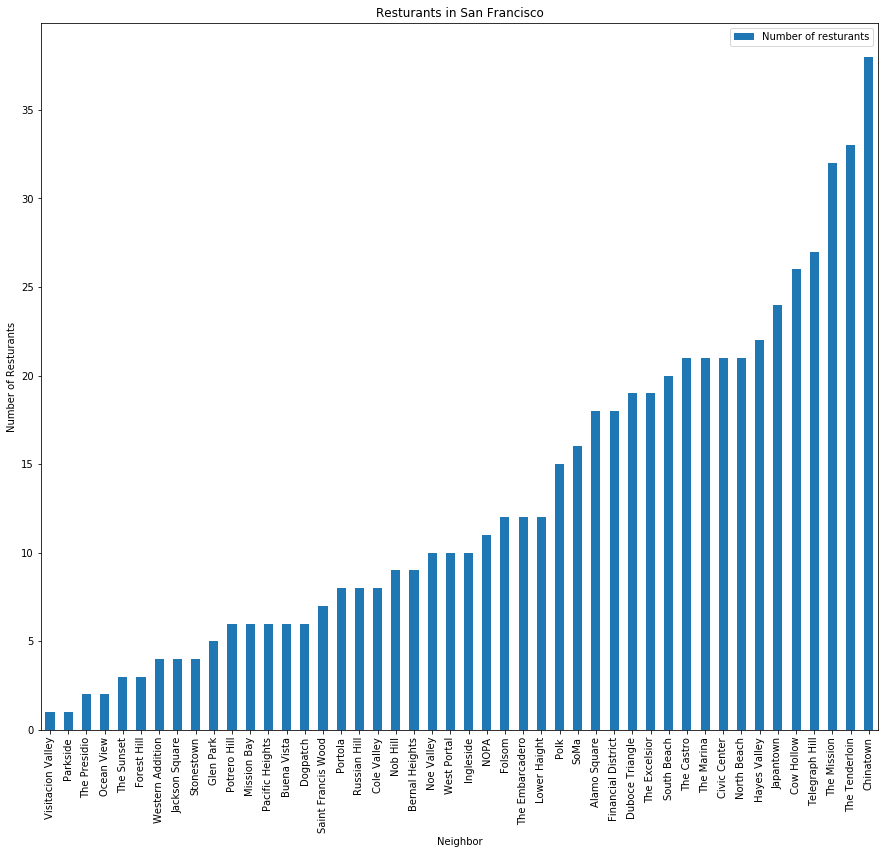

In [34]:
SF_rest_count.plot(kind='bar', figsize=(15, 13))
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Number of Resturants') # add y-label to the plot
plt.title('Resturants in San Francisco') # add title to the plot

# plt.show()
plt.savefig('Resturant.png', dpi=300)

### Extracting Vegetarian Restaurants 

In [35]:
Rest_v=[]
for i in range (SF_venues.shape[0]):
   Rest_v.append('Vegan' in SF_venues['Venue Category'].apply(lambda x: x.split(' '))[i])

In [36]:
SF_Veg=SF_venues[Rest_v]
print('There are total of {} vegeterian resturant in San Francisco'. format(SF_Veg.shape[0]))  

There are total of 12 vegeterian resturant in San Francisco


In [37]:
SF_Veg.shape

(12, 7)

In [51]:
SF_Veg.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
208,Chinatown,37.794301,-122.406376,Enjoy Vegetarian Restaurant,37.795833,-122.405093,Vegetarian / Vegan Restaurant
258,Chinatown,37.794301,-122.406376,Lucky Creation Restaurant,37.795056,-122.407271,Vegetarian / Vegan Restaurant
299,Civic Center,37.779026,-122.419906,Ananda Fuara,37.777693,-122.416353,Vegetarian / Vegan Restaurant
327,Civic Center,37.779026,-122.419906,Golden Era Vegan,37.781495,-122.416822,Vegetarian / Vegan Restaurant
354,Civic Center,37.779026,-122.419906,Thai Idea Vegetarian Restaurant,37.783395,-122.419141,Vegetarian / Vegan Restaurant
455,Cow Hollow,37.797262,-122.436248,Wildseed,37.797626,-122.432440,Vegetarian / Vegan Restaurant
487,Cow Hollow,37.797262,-122.436248,Vegan Picnic,37.797490,-122.431748,Vegetarian / Vegan Restaurant
1219,Nob Hill,37.794479,-122.415592,Nourish Cafe,37.790529,-122.417296,Vegetarian / Vegan Restaurant
2264,The Marina,37.779026,-122.419906,Ananda Fuara,37.777693,-122.416353,Vegetarian / Vegan Restaurant
2292,The Marina,37.779026,-122.419906,Golden Era Vegan,37.781495,-122.416822,Vegetarian / Vegan Restaurant


In [39]:
Veg_count=SF_Veg.groupby('Neighborhood').count()[['Venue']]

In [40]:
Veg_count.rename(columns={'Venue': 'Number of Vegi resturants'}, inplace=True)

In [41]:
Veg_count['Total Number of Resturants']=SF_rest_count.loc[Veg_count.index]

In [42]:
Veg_count.sort_values(by='Total Number of Resturants', inplace=True)

In [43]:
labels=SF_rest_count.index

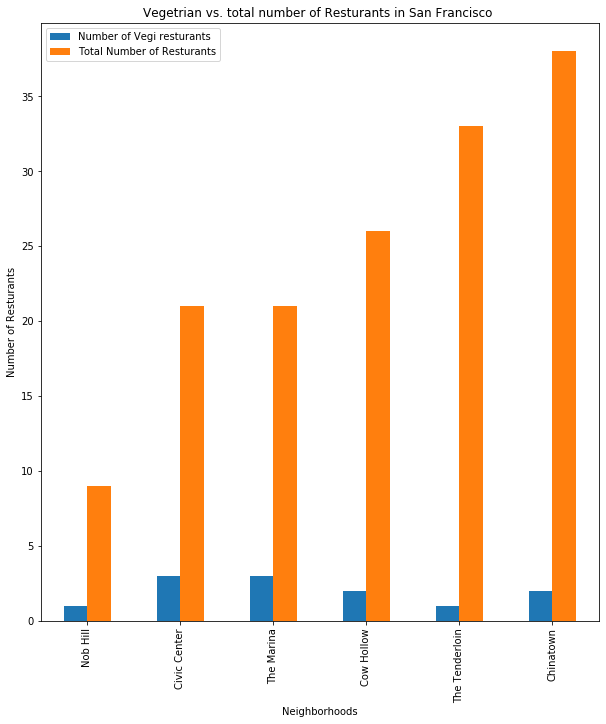

In [59]:
Veg_count.plot(kind='bar', figsize=(10, 11))
plt.xlabel('Neighborhoods') # add to x-label to the plot
plt.ylabel('Number of Resturants') # add y-label to the plot
plt.title('Vegetrian vs. total number of Resturants in San Francisco ') # add title to the plot

plt.savefig('Veg Resturant.png')

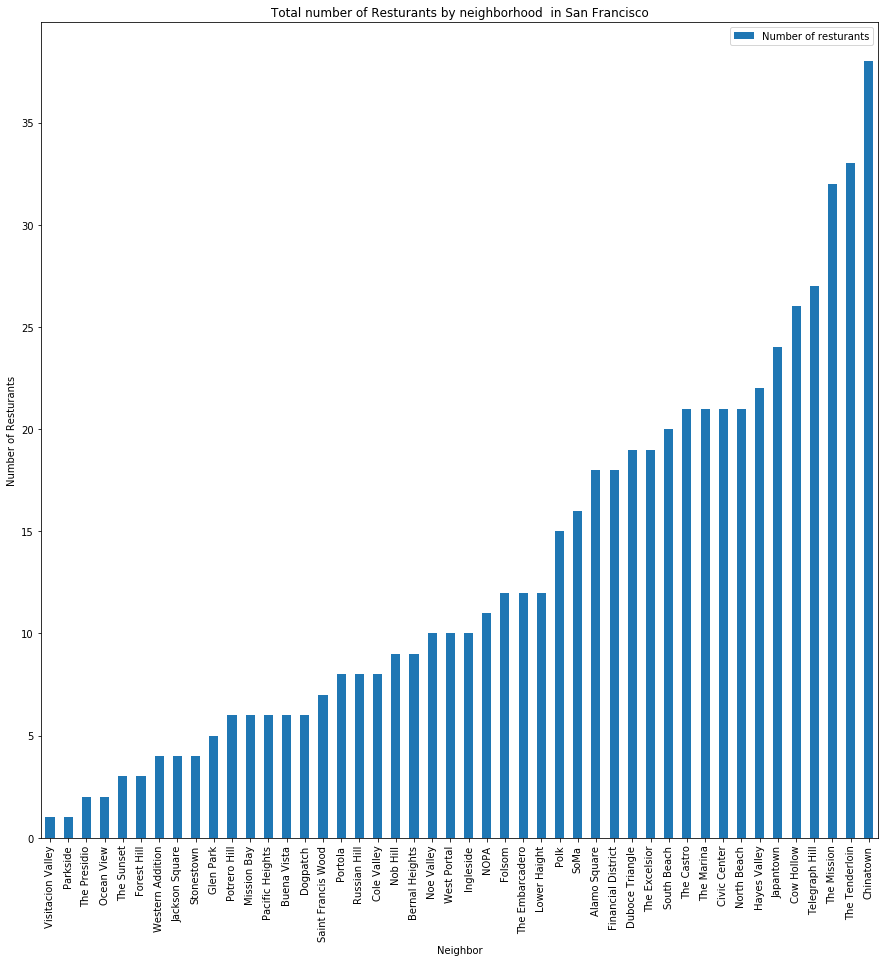

In [56]:
SF_rest_count.plot(kind='bar', figsize=(15, 15))
# Veg_count.plot(kind='bar', figsize=(10, 6), ax=ax)
plt.xlabel('Neighbor') # add to x-label to the plot
plt.ylabel('Number of Resturants') # add y-label to the plot
plt.title('Total number of Resturants by neighborhood  in San Francisco') # add title to the plot

plt.savefig('Resturant.png')

### Visualizing Vegeterian restaurants on Map

In [60]:
# create map of SF using latitude and longitude values
map_SF = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(SF_Veg['Venue Latitude'], SF_Veg['Venue Longitude'], SF_Veg['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
#         fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SF)  
    
map_SF

#### Analyzing Each Neighborhood for all resturants 

In [61]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_rest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangsu Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Sicilian Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
5,Alamo Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Alamo Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,Alamo Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21,Alamo Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
27,Alamo Square,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
SF_onehot.shape

(596, 61)

##### grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each restaurant category

In [63]:
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped

,Neighborhood,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Brazilian Restaurant,Burmese Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangsu Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salvadoran Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Sicilian Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Alamo Square,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.055556,0.000000,0.000000,0.00000,0.000000,0.055556,0.000000,0.055556,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.00000,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.000000,0.111111,0.000000,0.00,0.000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bernal Heights,0.000000,0.111111,0.000000,0.111111,0.000,0.000000,0.000000,0.000000,0.111111,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Buena Vista,0.000000,0.000000,0.000000,0.000000,0.000,0.166667,0.000000,0.166667,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chinatown,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.026316,0.000000,0.157895,0.00000,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.026316,0.078947,0.026316,0.052632,0.00000,0.026316,0.000000,0.000000,0.026316,0.026316,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.026316,0.052632,0.026316,0.00000,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632
4,Civic Center,0.000000,0.047619,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.095238,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.142857,0.000000,0.00,0.000,0.047619,0.000000,0.000000,0.000000,0.142857,0.047619
5,Cole Valley,0.000000,0.000000,0.000000,0.000000,0.000,0.00000

In [64]:
SF_grouped.shape

(46, 61)

###### printing each neighborhood along with the top 5 most common restaurants 

In [65]:
num_top_venues = 5

for hood in SF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alamo Square----
                  venue  freq
0  Ethiopian Restaurant  0.11
1    Seafood Restaurant  0.11
2      Sushi Restaurant  0.11
3     Indian Restaurant  0.11
4    Mexican Restaurant  0.06


----Bernal Heights----
                     venue  freq
0       Italian Restaurant  0.22
1       Mexican Restaurant  0.11
2  New American Restaurant  0.11
3        Indian Restaurant  0.11
4      Peruvian Restaurant  0.11


----Buena Vista----
                  venue  freq
0    Seafood Restaurant  0.33
1  Fast Food Restaurant  0.17
2     Korean Restaurant  0.17
3  Brazilian Restaurant  0.17
4  Cantonese Restaurant  0.17


----Chinatown----
                     venue  freq
0       Chinese Restaurant  0.16
1  New American Restaurant  0.11
2       Italian Restaurant  0.08
3               Restaurant  0.05
4      Japanese Restaurant  0.05


----Civic Center----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.14
1               Sushi Restaurant  0.14
2              F

                   venue  freq
0        Thai Restaurant  0.15
1  Vietnamese Restaurant  0.12
2     Mexican Restaurant  0.12
3       Sushi Restaurant  0.06
4    American Restaurant  0.06


----Visitacion Valley----
                       venue  freq
0      Vietnamese Restaurant   1.0
1        American Restaurant   0.0
2         Mexican Restaurant   0.0
3  Middle Eastern Restaurant   0.0
4        Moroccan Restaurant   0.0


----West Portal----
                venue  freq
0  Mexican Restaurant   0.2
1  Italian Restaurant   0.2
2     Thai Restaurant   0.1
3   Indian Restaurant   0.1
4    Sushi Restaurant   0.1


----Western Addition----
                  venue  freq
0    Seafood Restaurant  0.25
1  Pakistani Restaurant  0.25
2     German Restaurant  0.25
3     French Restaurant  0.25
4    African Restaurant  0.00




#### Puting that into a pandas dataframe

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

In [68]:
neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Indian Restaurant,Seafood Restaurant,Ethiopian Restaurant,Sushi Restaurant,Hunan Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant
1,Bernal Heights,Italian Restaurant,American Restaurant,Asian Restaurant,Mexican Restaurant,Indian Restaurant,Caribbean Restaurant,New American Restaurant,Peruvian Restaurant,Vietnamese Restaurant,Hawaiian Restaurant
2,Buena Vista,Seafood Restaurant,Brazilian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Korean Restaurant,Austrian Restaurant,Filipino Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
3,Chinatown,Chinese Restaurant,New American Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Dim Sum Restaurant,Sushi Restaurant,Szechuan Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant
4,Civic Center,Vegetarian / Vegan Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Ramen Restaurant
5,Cole Valley,Vietnamese Restaurant,Thai Restaurant,Caribbean Restaurant,Mexican Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Indian Restaurant,Fast Food Restaurant,Hunan Restaurant
6,Cow Hollow,Italian Restaurant,Mexican Restaurant,French Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Caribbean Restaurant,Hotpot Restaurant,New American Restaurant
7,Dogpatch,Restaurant,Latin American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
8,Duboce Triangle,New American Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant,Scandinavian Restaurant
9,Financial District,Restaurant,Japanese Restaurant,Mediterranean Restaurant,New American Restaurant,Dim Sum Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant


##  Clustering Neighborhoods

In [69]:
kclusters = 5
SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)


In [70]:
kmeans.labels_

array([1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 3,
       1, 1])

#### adding cluster labels to a new dataframe

In [ ]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = sf_neigh

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
SF_merged.dropna(inplace=True)

In [73]:
SF_merged.head(10) # check the last columns!

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,37.776360,-122.434689,1.0,Indian Restaurant,Seafood Restaurant,Ethiopian Restaurant,Sushi Restaurant,Hunan Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant
2,Bernal Heights,37.741001,-122.414214,2.0,Italian Restaurant,American Restaurant,Asian Restaurant,Mexican Restaurant,Indian Restaurant,Caribbean Restaurant,New American Restaurant,Peruvian Restaurant,Vietnamese Restaurant,Hawaiian Restaurant
3,Buena Vista,37.806532,-122.420648,2.0,Seafood Restaurant,Brazilian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Korean Restaurant,Austrian Restaurant,Filipino Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
5,Chinatown,37.794301,-122.406376,1.0,Chinese Restaurant,New American Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Dim Sum Restaurant,Sushi Restaurant,Szechuan Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant
6,Civic Center,37.779026,-122.419906,1.0,Vegetarian / Vegan Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Ramen Restaurant
7,Cole Valley,37.765813,-122.449962,2.0,Vietnamese Restaurant,Thai Restaurant,Caribbean Restaurant,Mexican Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Indian Restaurant,Fast Food Restaurant,Hunan Restaurant
8,Cow Hollow,37.797262,-122.436248,1.0,Italian Restaurant,Mexican Restaurant,French Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Caribbean Restaurant,Hotpot Restaurant,New American Restaurant
11,Dogpatch,37.760698,-122.389202,1.0,Restaurant,Latin American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
12,Duboce Triangle,37.767138,-122.432230,2.0,New American Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant,Scandinavian Restaurant
14,Financial District,37.793647,-122.398938,2.0,Restaurant,Japanese Restaurant,Mediterranean Restaurant,New American Restaurant,Dim Sum Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant


Visulizing the clusters

In [72]:
# create map
map_clusters = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['latitude'], SF_merged['longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining clusters 

## Cluster 1 

In [288]:

SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Ocean View,Thai Restaurant,Chinese Restaurant,Vietnamese Restaurant,Ethiopian Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
35,Parkside,Chinese Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
38,Portola,Vietnamese Restaurant,Chinese Restaurant,Cantonese Restaurant,Dim Sum Restaurant,Filipino Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant
42,Saint Francis Wood,Sushi Restaurant,Chinese Restaurant,Vietnamese Restaurant,Indian Restaurant,Greek Restaurant,Ethiopian Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Hunan Restaurant


## Cluster 2

In [289]:
SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Indian Restaurant,Seafood Restaurant,Ethiopian Restaurant,Sushi Restaurant,Hunan Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Pakistani Restaurant,Restaurant
5,Chinatown,Chinese Restaurant,New American Restaurant,Italian Restaurant,Vietnamese Restaurant,Restaurant,Dim Sum Restaurant,Sushi Restaurant,Szechuan Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant
6,Civic Center,Vegetarian / Vegan Restaurant,French Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Southern / Soul Food Restaurant,Mediterranean Restaurant,Mexican Restaurant,New American Restaurant,Ramen Restaurant
8,Cow Hollow,Italian Restaurant,Mexican Restaurant,French Restaurant,American Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Sushi Restaurant,Caribbean Restaurant,Hotpot Restaurant,New American Restaurant
11,Dogpatch,Restaurant,Latin American Restaurant,Italian Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
16,Forest Hill,Japanese Restaurant,Hotpot Restaurant,French Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant
17,Glen Park,Italian Restaurant,Mexican Restaurant,Thai Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Greek Restaurant,Filipino Restaurant,French Restaurant,German Restaurant
19,Hayes Valley,French Restaurant,Sushi Restaurant,New American Restaurant,Italian Restaurant,Restaurant,Indian Restaurant,Mediterranean Restaurant,Mexican Restaurant,German Restaurant,Ramen Restaurant
24,Japantown,Vietnamese Restaurant,American Restaurant,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,New American Restaurant,Ramen Restaurant,Seafood Restaurant,Asian Restaurant
25,Lower Haight,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Ramen Restaurant,Korean Restaurant


## Cluster 3

In [290]:
SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bernal Heights,Italian Restaurant,American Restaurant,Asian Restaurant,Mexican Restaurant,Indian Restaurant,Caribbean Restaurant,New American Restaurant,Peruvian Restaurant,Vietnamese Restaurant,Hawaiian Restaurant
3,Buena Vista,Seafood Restaurant,Brazilian Restaurant,Fast Food Restaurant,Cantonese Restaurant,Korean Restaurant,Austrian Restaurant,Filipino Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
7,Cole Valley,Vietnamese Restaurant,Thai Restaurant,Caribbean Restaurant,Mexican Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Indian Restaurant,Fast Food Restaurant,Hunan Restaurant
12,Duboce Triangle,New American Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Vietnamese Restaurant,Indian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant,Scandinavian Restaurant
14,Financial District,Restaurant,Japanese Restaurant,Mediterranean Restaurant,New American Restaurant,Dim Sum Restaurant,Latin American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant
15,Folsom,Seafood Restaurant,Japanese Restaurant,Vietnamese Restaurant,American Restaurant,Dim Sum Restaurant,French Restaurant,Mediterranean Restaurant,New American Restaurant,African Restaurant,Sushi Restaurant
22,Ingleside,Vietnamese Restaurant,Pakistani Restaurant,American Restaurant,Asian Restaurant,Dim Sum Restaurant,Japanese Restaurant,Mexican Restaurant,New American Restaurant,Korean Restaurant,Sushi Restaurant
23,Jackson Square,Fast Food Restaurant,Mexican Restaurant,Italian Restaurant,Vietnamese Restaurant,Jiangsu Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant
27,Mission Bay,Ethiopian Restaurant,Asian Restaurant,Dumpling Restaurant,Fast Food Restaurant,Mediterranean Restaurant,American Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Filipino Restaurant
44,South Beach,Mexican Restaurant,Thai Restaurant,New American Restaurant,American Restaurant,Mediterranean Restaurant,Korean Restaurant,Southern / Soul Food Restaurant,French Restaurant,Japanese Restaurant,Sushi Restaurant


## Cluster 4

In [291]:
SF_merged.loc[SF_merged['Cluster Labels'] == 3, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
59,Visitacion Valley,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant,Hawaiian Restaurant


## Cluster 5

In [292]:
SF_merged.loc[SF_merged['Cluster Labels'] == 4, SF_merged.columns[[0] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,The Presidio,American Restaurant,Vietnamese Restaurant,Fast Food Restaurant,Jewish Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,Hunan Restaurant,Hotpot Restaurant


## Discussion 



In [74]:
The_mission=SF_merged[SF_merged['Neighborhood']== 'The Mission']

In [75]:
The_mission

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,The Mission,37.752498,-122.412826,2.0,Mexican Restaurant,Latin American Restaurant,Sushi Restaurant,Salvadoran Restaurant,South Indian Restaurant,Jewish Restaurant,Fast Food Restaurant,Peruvian Restaurant,Restaurant,Cuban Restaurant


# Recomended Location 

In [76]:
# create map
map_clusters = folium.Map(location=[latitude_sf, longitude_sf], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(The_mission['latitude'], The_mission['longitude'], The_mission['Neighborhood'], The_mission['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters